# Homework 7
## Task  7.1
### a)

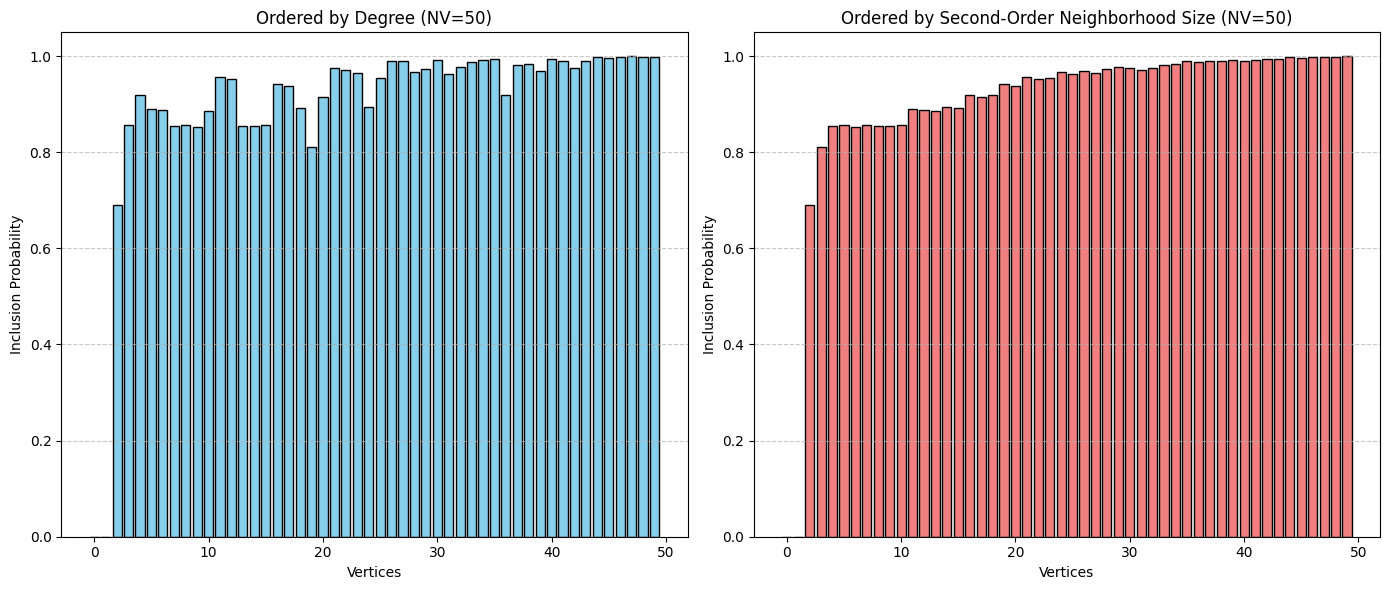

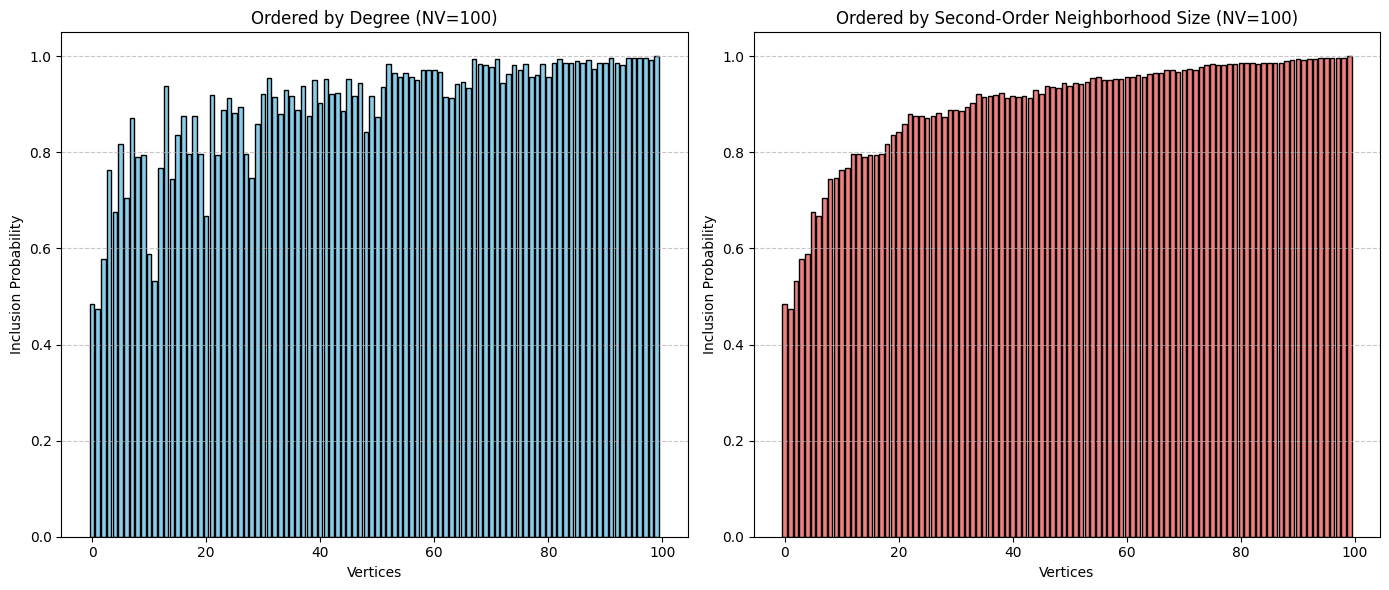

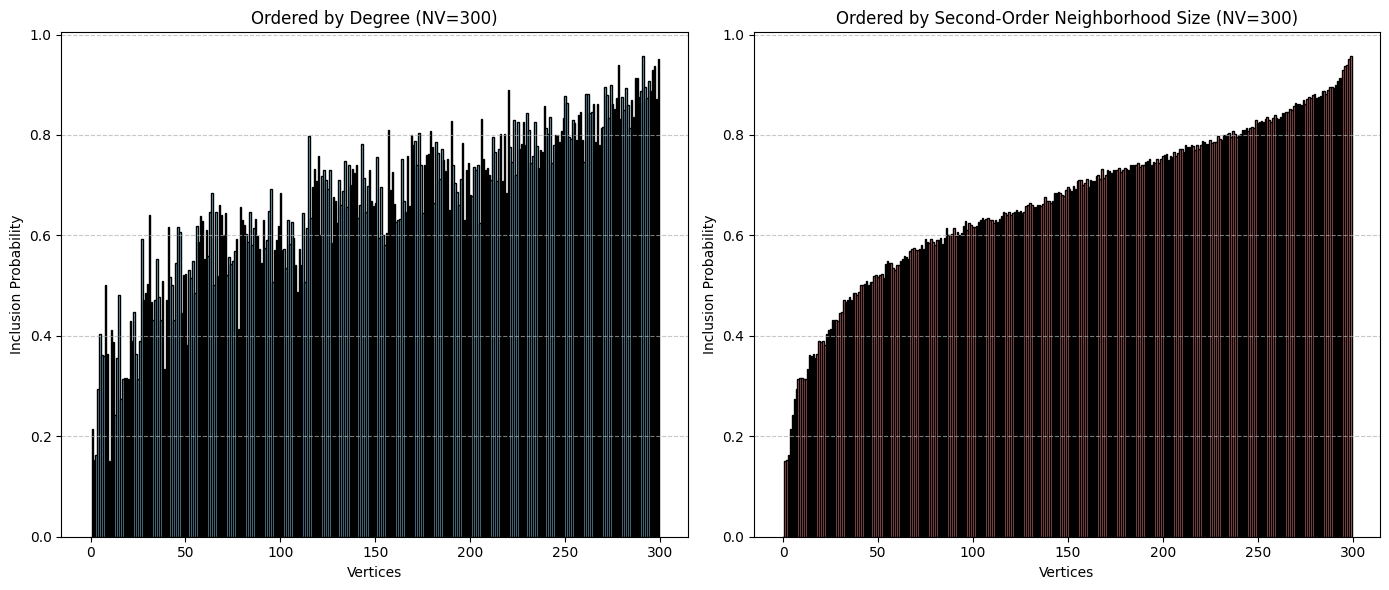

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def two_step_snowball_sampling(graph, n):
    """
    Function for implementing two step snowball sampling:
    
    Step 1: Draw v0 of size n uniformly from V without replacement
    Step 2: Add all edges incident to v0
    Step 3: Add all vertices incident to e1
    Step 4: Add all edges incident to v1
    Step 5: Add all vertices incident to e1

    Return final vertices set
    Arguments: graph - graph to sample from, n - number of nodes to sample from in 1st step.
    """
    # step 1
    v0 = np.random.choice(graph.nodes(), size=n, replace=False)

    # step 2
    e1 = graph.edges(v0)
    
    # step 3
    v1 = set([v for edge in e1 for v in edge])

    # step 4
    e2 = graph.edges(v1)
    
    # step 5
    v_final = set([v for edge in e2 for v in edge])
    
    return v_final

# different NV to try
NV_list = [50, 100, 300]

for NV in NV_list:
    p = np.log(NV) / NV
    
    # generating the graph with imported function
    G = nx.erdos_renyi_graph(NV, p)
    
    # num of simulations for Monte Carlo
    num_simulations = 10000
    
    # array for storing the inclusion counts
    inclusion_counts = np.zeros(NV)
    
    # Monte Carlo
    for _ in range(num_simulations):
        sampled_vertices = two_step_snowball_sampling(G, n=10) 
        inclusion_counts[list(sampled_vertices)] += 1
    
    # vertex inclusion probabilities
    vertex_inclusion_probabilities = inclusion_counts / num_simulations
    
    # ordering vertices by degree
    ordered_vertices_by_degree = sorted(G.nodes(), key=lambda x: G.degree[x])
    
    # ordering vertices by the size of their second-order neighbourhood
    ordered_vertices_by_neighborhood_size = sorted(G.nodes(), key=lambda x: len(set(nx.single_source_shortest_path_length(G, x, cutoff=2))))
    
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.bar(range(NV), [vertex_inclusion_probabilities[v] for v in ordered_vertices_by_degree], color='skyblue', edgecolor='black')
    plt.title(f'Ordered by Degree (NV={NV})')
    plt.xlabel('Vertices')
    plt.ylabel('Inclusion Probability')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.subplot(1, 2, 2)
    plt.bar(range(NV), [vertex_inclusion_probabilities[v] for v in ordered_vertices_by_neighborhood_size], color='lightcoral', edgecolor='black')
    plt.title(f'Ordered by Second-Order Neighborhood Size (NV={NV})')
    plt.xlabel('Vertices')
    plt.ylabel('Inclusion Probability')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

In the first graph we can see vertices ordered by their degree (number of edges) and their inclusion probabilities, while in the other graph we order the vertices by neighbourghood size and show their inclusion probabilities. We order them increasingly in both instances.

# Notes:
`nx.single_source_shortest_path_length(G, x, cutoff=2)` This function computes the shortest path lengths from a source vertex  x to all other vertices in the graph  G within a cutoff distance of 2. The result is a dictionary where keys are destination vertices, and values are the corresponding shortest path lengths.